## Google Data Analytics - Capstone Project
### Cyclistic - 'How does a bike-share navigate speedy success?'

This notebook contains the steps taken to answer the main project question:
* _How do annual members and casual riders use Cyclistic bikes differently?_ 

#### Preparing and Processing the data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading 12 files for the 12 most recent months of Cyclistic data
df1 = pd.read_csv('202006-divvy-tripdata.csv')
df2 = pd.read_csv('202007-divvy-tripdata.csv')
df3 = pd.read_csv('202008-divvy-tripdata.csv')
df4 = pd.read_csv('202009-divvy-tripdata.csv')
df5 = pd.read_csv('202010-divvy-tripdata.csv')
df6 = pd.read_csv('202011-divvy-tripdata.csv')
df7 = pd.read_csv('202012-divvy-tripdata.csv')
df8 = pd.read_csv('202101-divvy-tripdata.csv')
df9 = pd.read_csv('202102-divvy-tripdata.csv')
df10 = pd.read_csv('202103-divvy-tripdata.csv')
df11 = pd.read_csv('202104-divvy-tripdata.csv')
df12 = pd.read_csv('202105-divvy-tripdata.csv')

In [3]:
# Stacking the 12 months data using pd.concat
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
df = pd.concat(frames, ignore_index=True)

In [4]:
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
4073556,EF56D7D1D612AC11,electric_bike,2021-05-20 16:32:14,2021-05-20 16:35:39,Blackstone Ave & Hyde Park Blvd,13398,NaN,NaN,41.802581,-87.590230,41.80000,-87.600000,member
4073557,745191CB9F21DE3C,classic_bike,2021-05-29 16:40:37,2021-05-29 17:22:37,Sheridan Rd & Montrose Ave,TA1307000107,Michigan Ave & Oak St,13042,41.961670,-87.654640,41.90096,-87.623777,casual
4073558,428575BAA5356BFF,electric_bike,2021-05-31 14:24:54,2021-05-31 14:31:38,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961525,-87.654651,41.95000,-87.650000,member
4073559,FC8A4A7AB7249662,electric_bike,2021-05-25 16:01:33,2021-05-25 16:07:37,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961654,-87.654721,41.98000,-87.660000,member
4073560,E873B8AA3EE84678,docked_bike,2021-05-12 12:22:14,2021-05-12 12:30:27,Sheridan Rd & Montrose Ave,TA1307000107,Clark St & Grace St,TA1307000127,41.961670,-87.654640,41.95078,-87.659172,casual


In [5]:
df.shape

(4073561, 13)

In [6]:
# Finding out percentage of null values in the dataset
(df.isnull().sum()/df.shape[0])*100

ride_id               0.000000
rideable_type         0.000000
started_at            0.000000
ended_at              0.000000
start_station_name    4.958193
start_station_id      4.973560
end_station_name      5.626281
end_station_id        5.637598
start_lat             0.000000
start_lng             0.000000
end_lat               0.123651
end_lng               0.123651
member_casual         0.000000
dtype: float64

In [7]:
# Dropping the null values
df.dropna(inplace=True)

In [8]:
df.shape

(3759262, 13)

In [9]:
# An inspection into the data types of variables
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [10]:
# Converting the date variables to datetime datatype
df['started_at'] = pd.to_datetime(df['started_at'], format = '%Y-%m-%d %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at'], format = '%Y-%m-%d %H:%M:%S')

In [11]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8CD5DE2C2B6C4CFC,docked_bike,2020-06-13 23:24:48,2020-06-13 23:36:55,Wilton Ave & Belmont Ave,117,Damen Ave & Clybourn Ave,163,41.940180,-87.653040,41.931931,-87.677856,casual
1,9A191EB2C751D85D,docked_bike,2020-06-26 07:26:10,2020-06-26 07:31:58,Federal St & Polk St,41,Daley Center Plaza,81,41.872077,-87.629543,41.884241,-87.629634,member
2,F37D14B0B5659BCF,docked_bike,2020-06-23 17:12:41,2020-06-23 17:21:14,Daley Center Plaza,81,State St & Harrison St,5,41.884241,-87.629634,41.874053,-87.627716,member
3,C41237B506E85FA1,docked_bike,2020-06-20 01:09:35,2020-06-20 01:28:24,Broadway & Cornelia Ave,303,Broadway & Berwyn Ave,294,41.945529,-87.646439,41.978353,-87.659753,casual
4,4B51B3B0BDA7787C,docked_bike,2020-06-25 16:59:25,2020-06-25 17:08:48,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117,41.921540,-87.653818,41.940180,-87.653040,casual


In [12]:
# Calculating Trip Duration using the start time and the end time and taking the difference
# This variable is the key variable of interest. 
df['trip_duration'] = (df['ended_at'] - df['started_at']).astype('timedelta64[s]')
df['trip_duration'] = round(df['trip_duration']/60, 3)

In [13]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,8CD5DE2C2B6C4CFC,docked_bike,2020-06-13 23:24:48,2020-06-13 23:36:55,Wilton Ave & Belmont Ave,117,Damen Ave & Clybourn Ave,163,41.940180,-87.653040,41.931931,-87.677856,casual,12.117
1,9A191EB2C751D85D,docked_bike,2020-06-26 07:26:10,2020-06-26 07:31:58,Federal St & Polk St,41,Daley Center Plaza,81,41.872077,-87.629543,41.884241,-87.629634,member,5.800
2,F37D14B0B5659BCF,docked_bike,2020-06-23 17:12:41,2020-06-23 17:21:14,Daley Center Plaza,81,State St & Harrison St,5,41.884241,-87.629634,41.874053,-87.627716,member,8.550
3,C41237B506E85FA1,docked_bike,2020-06-20 01:09:35,2020-06-20 01:28:24,Broadway & Cornelia Ave,303,Broadway & Berwyn Ave,294,41.945529,-87.646439,41.978353,-87.659753,casual,18.817
4,4B51B3B0BDA7787C,docked_bike,2020-06-25 16:59:25,2020-06-25 17:08:48,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117,41.921540,-87.653818,41.940180,-87.653040,casual,9.383


In [14]:
# Finding out wrongly entered values --- trip duration cannot be less than 0, since the start time should 
# always be earlier than the end time. 
df_wrong = df[df['trip_duration'] < 0]
df_wrong.shape[0]

10237

There are 10.2k rows with trip duration less than 0 minutes

### Analyzing the data

In [15]:
df['member_casual'].value_counts()

member    2181125
casual    1578137
Name: member_casual, dtype: int64

In [16]:
print('There are {} more Members than Casual Riders'.format((df['member_casual'].value_counts()[0]) - df['member_casual'].value_counts()[1]))

There are 602988 more Members than Casual Riders


In [17]:
# We also do not need rows with trip duration exactly == 0 minutes
zero_trip_duration = df[df['trip_duration'] == 0.000].index

In [18]:
# Dropping the rows with trip duration = 0 
df.drop(zero_trip_duration, inplace = True)

In [19]:
wrong_index = df[df['trip_duration'] < 0].index

In [20]:
# Dropping the rows with trip duration less than 0 
df.drop(wrong_index, inplace=True)

In [21]:
df.shape

(3748733, 14)

Descriptive Statistics of the Trip Duration variable

In [22]:
round(df['trip_duration'].describe(),3)

count    3748733.000
mean          27.108
std          245.108
min            0.017
25%            7.867
50%           14.267
75%           26.200
max        54283.350
Name: trip_duration, dtype: float64

In [24]:
# Descriptive statistics for trip duration where the user type is a member. 
member_stats = pd.DataFrame(round(df[df['member_casual'] == 'member']['trip_duration'].describe(), 3))
member_stats

,trip_duration
count,2173843.000
mean,15.284
std,63.549
min,0.017
25%,6.433
50%,11.183
75%,19.383
max,41271.000


In [25]:
# Descriptive Statistics for trip duration where the user type is a Casual rider
casual_stats = pd.DataFrame(round(df[df['member_casual'] == 'casual']['trip_duration'].describe(), 3))
casual_stats

,trip_duration
count,1574890.000
mean,43.430
std,370.095
min,0.017
25%,11.400
50%,20.800
75%,39.500
max,54283.350


In [26]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,8CD5DE2C2B6C4CFC,docked_bike,2020-06-13 23:24:48,2020-06-13 23:36:55,Wilton Ave & Belmont Ave,117,Damen Ave & Clybourn Ave,163,41.940180,-87.653040,41.931931,-87.677856,casual,12.117
1,9A191EB2C751D85D,docked_bike,2020-06-26 07:26:10,2020-06-26 07:31:58,Federal St & Polk St,41,Daley Center Plaza,81,41.872077,-87.629543,41.884241,-87.629634,member,5.800
2,F37D14B0B5659BCF,docked_bike,2020-06-23 17:12:41,2020-06-23 17:21:14,Daley Center Plaza,81,State St & Harrison St,5,41.884241,-87.629634,41.874053,-87.627716,member,8.550
3,C41237B506E85FA1,docked_bike,2020-06-20 01:09:35,2020-06-20 01:28:24,Broadway & Cornelia Ave,303,Broadway & Berwyn Ave,294,41.945529,-87.646439,41.978353,-87.659753,casual,18.817
4,4B51B3B0BDA7787C,docked_bike,2020-06-25 16:59:25,2020-06-25 17:08:48,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117,41.921540,-87.653818,41.940180,-87.653040,casual,9.383


In [27]:
# Renaming the column to make more sense
df.rename(columns = {'member_casual': 'user_type'}, inplace=True)

In [28]:
df.groupby(['user_type']).mean()['trip_duration']

user_type
casual    43.430082
member    15.283836
Name: trip_duration, dtype: float64

The average duration of trips is much higher for a casual rider than for an annual member. 

In [29]:
df.groupby(['user_type']).median()['trip_duration']

user_type
casual    20.800
member    11.183
Name: trip_duration, dtype: float64

The median trip duration is of more interest in this project than the mean, since about 4000 records in the dataset contain trip durations of more than 1000 minutes. These outliers affect the mean trip duration. Hence, median trip duration is a better representative of the riding patterns. 

In [30]:
# Creating a variable to indicate the day of the week (0 being Monday)
df['dayofweek'] = df['started_at'].dt.dayofweek

In [31]:
# Count of number of trips per week day
day = pd.DataFrame(df['dayofweek'].value_counts())
day

,dayofweek
5,700551
6,591239
4,549154
3,491952
2,488584
1,464320
0,462933


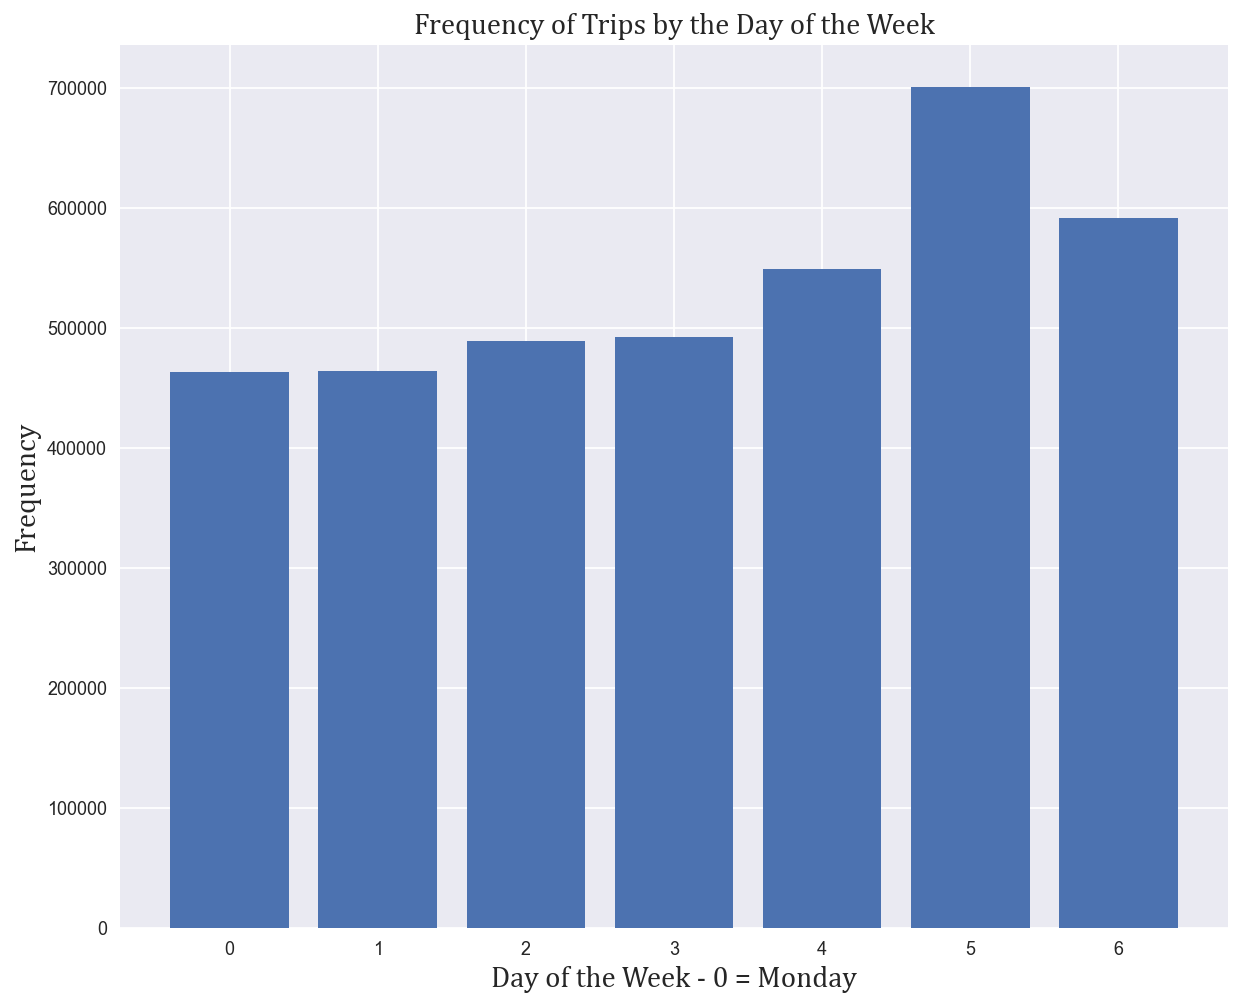

In [32]:
# Plot showing the number of trips made in each day of the week

fontdict = {'fontname':'cambria', 'size':16, 'weight':'normal'}
plt.style.use('seaborn')
plt.figure(figsize=(11,9), dpi=130)
plt.bar(day.index, height = day['dayofweek'])
plt.title('Frequency of Trips by the Day of the Week', fontdict = fontdict)
plt.xlabel('Day of the Week - 0 = Monday', fontdict = fontdict)
plt.ylabel('Frequency', fontdict = fontdict);

The graph shows that the users ride most on Saturday, and then Sunday and Friday.

In [33]:
dayofweek_pivot = pd.pivot_table(data = df, values = 'trip_duration', aggfunc = 'median', columns = 'user_type', index = 'dayofweek')

In [34]:
# Pivot table showing the median ride duration by members and casual riders based on day of the week
dayofweek_pivot

user_type,casual,member
dayofweek,,
0,20.500,10.600
1,18.750,10.633
2,18.033,10.667
3,18.083,10.667
4,19.233,10.950
5,22.883,12.500
6,24.200,12.683


In [35]:
x = dayofweek_pivot['casual'].index.values
y = dayofweek_pivot['member'].index.values

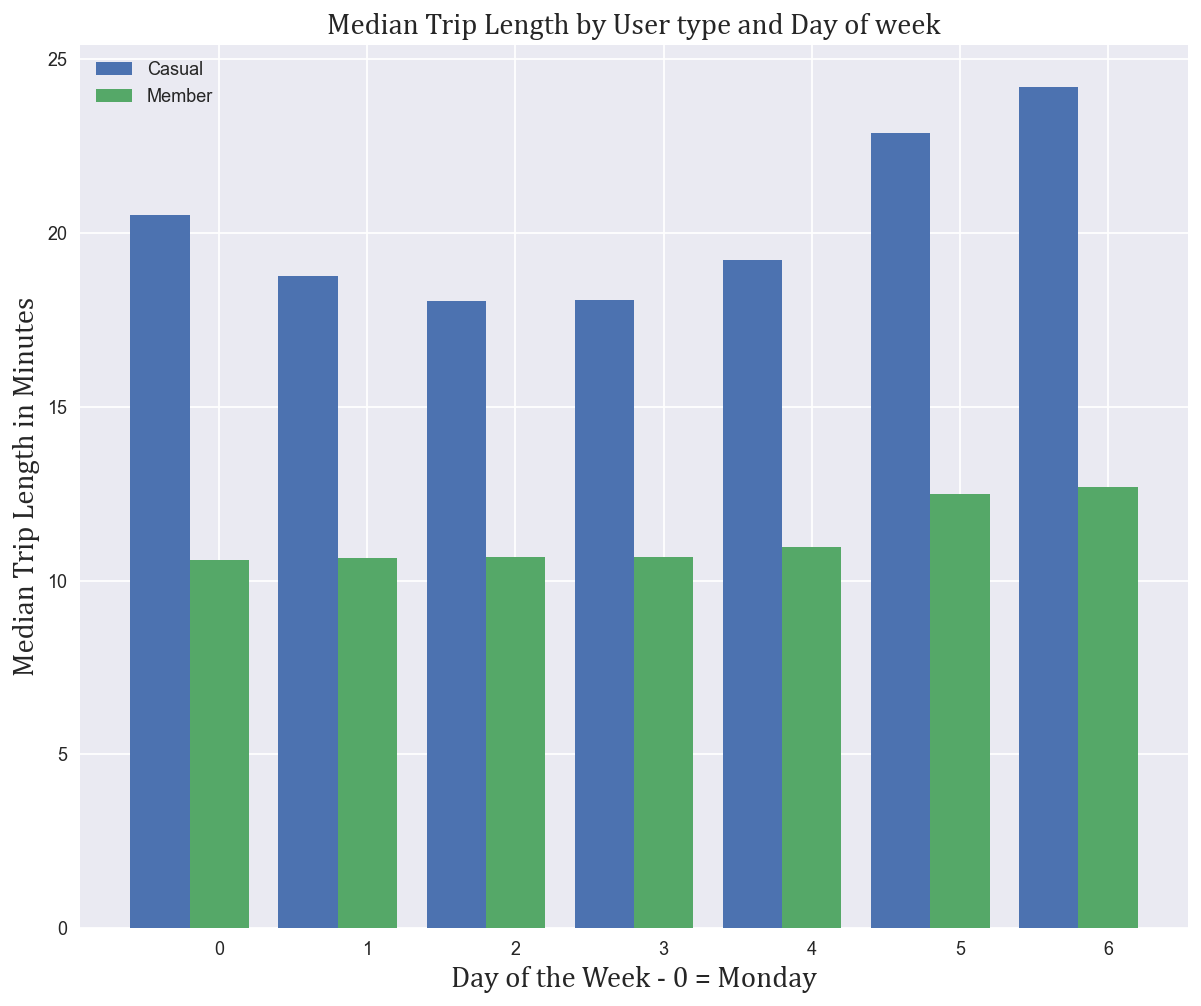

In [36]:
#Bar graph showing the median trip duration by user type and day of week
fontdict = {'fontname':'cambria', 'size':16, 'weight':'normal'}
plt.style.use('seaborn')
plt.figure(figsize=(11,9), dpi=130)
plt.bar(x = x-0.4, height = dayofweek_pivot['casual'], width = 0.4)
plt.bar(y, height = dayofweek_pivot['member'], width = 0.4)
plt.title('Median Trip Length by User type and Day of week', fontdict = fontdict)
plt.xlabel('Day of the Week - 0 = Monday', fontdict = fontdict)
plt.ylabel('Median Trip Length in Minutes', fontdict = fontdict)
plt.legend(['Casual', 'Member'])
plt.show()

Though there are more members in the data than the casual riders, the median trip duration is higher for casuals than for members. 

In [37]:
pd.DataFrame(df.groupby(['user_type', 'dayofweek']).median()['trip_duration'])

trip_duration
user_type dayofweek               
casual    0                 20.500
          1                 18.750
          2                 18.033
          3                 18.083
          4                 19.233
          5                 22.883
          6                 24.200
member    0                 10.600
          1                 10.633
          2                 10.667
          3                 10.667
          4                 10.950
          5                 12.500
          6                 12.683

In [38]:
df['rideable_type'].unique()

array(['docked_bike', 'electric_bike', 'classic_bike'], dtype=object)

In [39]:
# Pivot table showing the usage of different types of bikes by types of users
ride_type_pivot = pd.pivot_table(data = df, index = 'rideable_type', columns = 'user_type', values = 'ride_id', aggfunc = 'count')

In [40]:
ride_type_pivot

user_type,casual,member
rideable_type,,
classic_bike,264398,576650
docked_bike,1069164,1258224
electric_bike,241328,338969


In [41]:
df['user_type'].value_counts()

member    2173843
casual    1574890
Name: user_type, dtype: int64

In [42]:
df['user_type'].value_counts()

member    2173843
casual    1574890
Name: user_type, dtype: int64

In [43]:
# creating a month variable to analyze season-based trends in ridership
df['month'] = df['started_at'].dt.month

In [44]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,trip_duration,dayofweek,month
0,8CD5DE2C2B6C4CFC,docked_bike,2020-06-13 23:24:48,2020-06-13 23:36:55,Wilton Ave & Belmont Ave,117,Damen Ave & Clybourn Ave,163,41.940180,-87.653040,41.931931,-87.677856,casual,12.117,5,6
1,9A191EB2C751D85D,docked_bike,2020-06-26 07:26:10,2020-06-26 07:31:58,Federal St & Polk St,41,Daley Center Plaza,81,41.872077,-87.629543,41.884241,-87.629634,member,5.800,4,6
2,F37D14B0B5659BCF,docked_bike,2020-06-23 17:12:41,2020-06-23 17:21:14,Daley Center Plaza,81,State St & Harrison St,5,41.884241,-87.629634,41.874053,-87.627716,member,8.550,1,6
3,C41237B506E85FA1,docked_bike,2020-06-20 01:09:35,2020-06-20 01:28:24,Broadway & Cornelia Ave,303,Broadway & Berwyn Ave,294,41.945529,-87.646439,41.978353,-87.659753,casual,18.817,5,6
4,4B51B3B0BDA7787C,docked_bike,2020-06-25 16:59:25,2020-06-25 17:08:48,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117,41.921540,-87.653818,41.940180,-87.653040,casual,9.383,3,6


In [45]:
monthly = pd.pivot_table(data = df, values = 'ride_id', aggfunc = 'count', columns = 'user_type', index = 'month')
monthly

user_type,casual,member
month,,
1,14690,68818
2,8613,34381
3,75641,130046
4,120418,177781
5,216823,234155
6,154329,187711
7,268103,280514
8,281945,323707
9,214672,283556


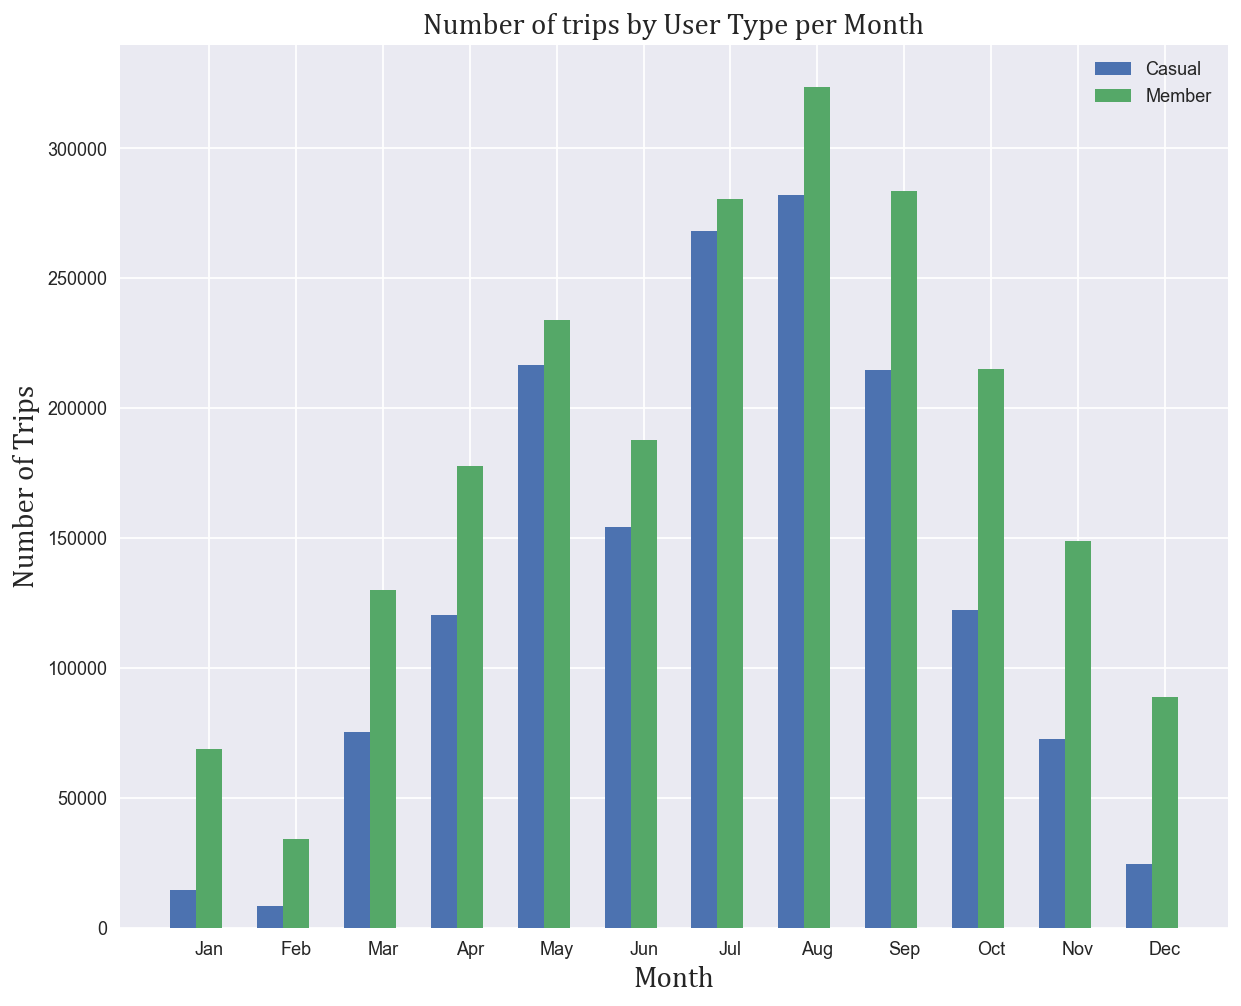

In [46]:
# Bar graph showing monthly ridership by user type

x = monthly['casual'].index.values
fontdict = {'fontname':'cambria', 'size':16, 'weight':'normal'}
plt.style.use('seaborn')
plt.figure(figsize=(11,9), dpi=130)
plt.bar(x = x-0.3, height = monthly['casual'], width = 0.3)
plt.bar(x = x, height = monthly['member'], width = 0.3)
plt.title('Number of trips by User Type per Month', fontdict = fontdict)
plt.xlabel('Month', fontdict = fontdict)
plt.ylabel('Number of Trips', fontdict = fontdict)
plt.legend(['Casual', 'Member'])
plt.xticks(ticks = x, labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

June, July, August are typically the summer months of Chicago, and that shows through the higher ridership for both casual and annual members in Cyclistic data. 

In [47]:
monthly_duration = pd.pivot_table(data = df, values = 'trip_duration', aggfunc = 'median', columns = 'user_type', index = 'month')
monthly_duration

user_type,casual,member
month,,
1,12.650,8.750
2,16.717,10.183
3,19.433,10.033
4,18.767,10.450
5,19.683,10.617
6,24.633,14.317
7,25.417,13.383
8,22.167,12.300
9,19.417,11.100


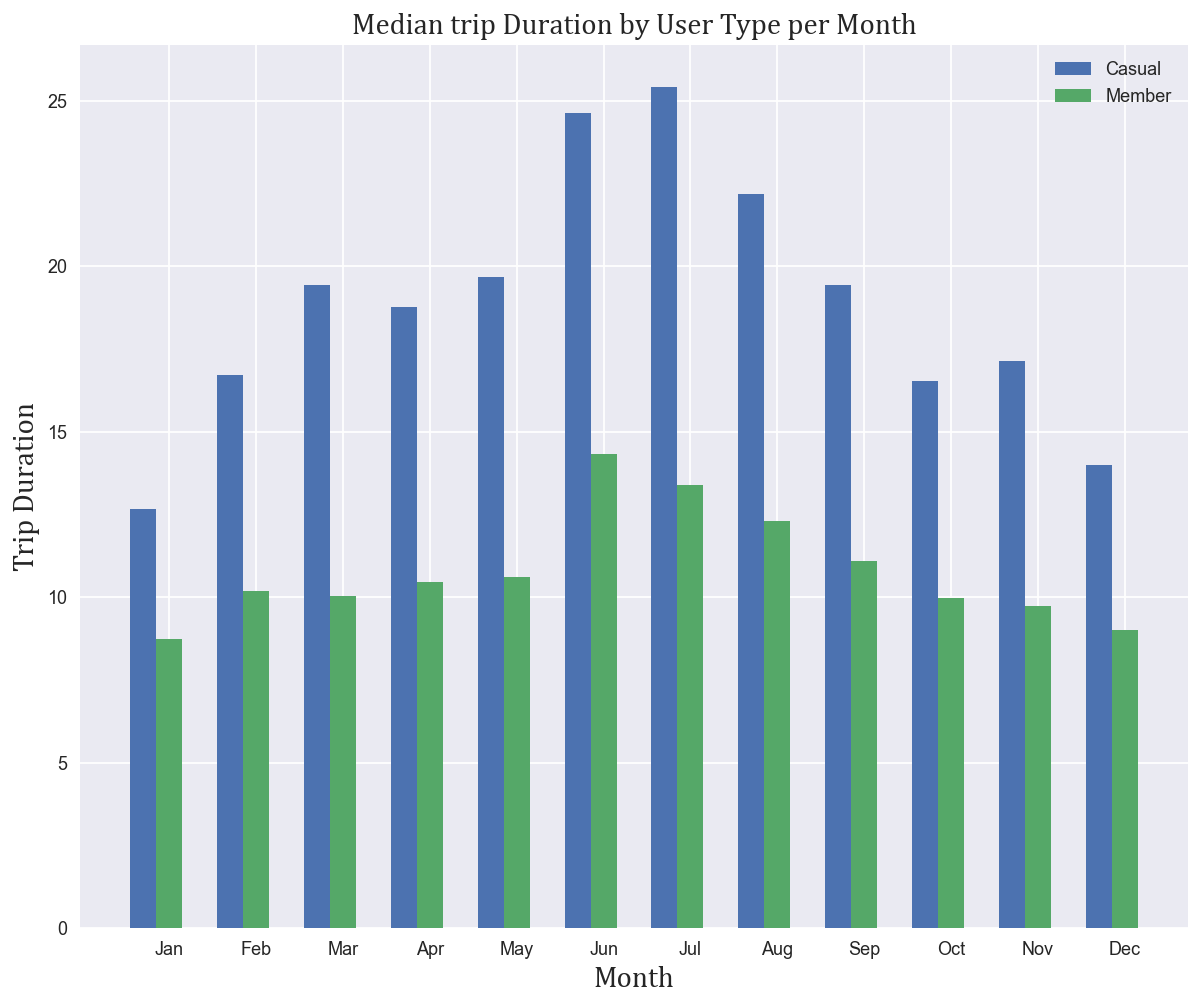

In [48]:
# Monthly median trip duration by user type

x = monthly_duration['casual'].index.values
fontdict = {'fontname':'cambria', 'size':16, 'weight':'normal'}
plt.style.use('seaborn')
plt.figure(figsize=(11,9), dpi=130)
plt.bar(x = x-0.3, height = monthly_duration['casual'], width = 0.3)
plt.bar(x = x, height = monthly_duration['member'], width = 0.3)
plt.title('Median trip Duration by User Type per Month', fontdict = fontdict)
plt.xlabel('Month', fontdict = fontdict)
plt.ylabel('Trip Duration', fontdict = fontdict)
plt.legend(['Casual', 'Member'])
plt.xticks(ticks = x, labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

As observed earlier, the Casual users have a much higher median trip duration than annual members, and both user types correspond to the same season-based increase and decrease in ridership.